In [2]:
import efficientnet.keras as efn
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Flatten, Dropout
from keras import optimizers

In [3]:
train_dir = 'images/new_images/train'
validation_dir = 'images/new_images/test'

In [4]:
# Add our data-augmentation parameters to ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

validation_generator = test_datagen.flow_from_directory( validation_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 879 images belonging to 2 classes.
Found 221 images belonging to 2 classes.


In [5]:
base_model = efn.EfficientNetB7(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [6]:
for layer in base_model.layers:
    layer.trainable = False

In [7]:
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation="sigmoid")(x)
model_final = Model(inputs = base_model.input, outputs = predictions)

In [8]:
model_final.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
eff_history = model_final.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 30, epochs = 5)

Epoch 1/5
30/30 [==============================] - 141s 5s/step - loss: 2.0563 - accuracy: 0.5142 - val_loss: 1.6377 - val_accuracy: 0.4842
Epoch 2/5
30/30 [==============================] - 140s 5s/step - loss: 1.4937 - accuracy: 0.4508 - val_loss: 1.2523 - val_accuracy: 0.4796
Epoch 3/5
30/30 [==============================] - 137s 5s/step - loss: 1.0049 - accuracy: 0.5543 - val_loss: 0.9744 - val_accuracy: 0.5158
Epoch 4/5
30/30 [==============================] - 140s 5s/step - loss: 1.0508 - accuracy: 0.4992 - val_loss: 0.7588 - val_accuracy: 0.5249
Epoch 5/5
30/30 [==============================] - 142s 5s/step - loss: 0.8936 - accuracy: 0.5242 - val_loss: 0.6988 - val_accuracy: 0.5430


In [11]:
(eval_loss, eval_accuracy) = model_final.evaluate(  
     validation_generator, batch_size=20, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  

12/12 [==============================] - 31s 3s/step - loss: 0.6988 - accuracy: 0.5430
[INFO] accuracy: 54.30%
[INFO] Loss: 0.6987894177436829


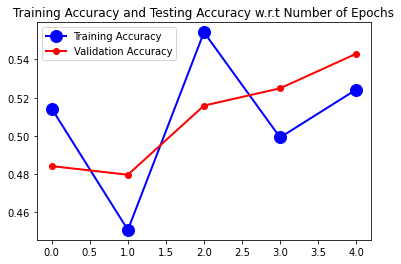

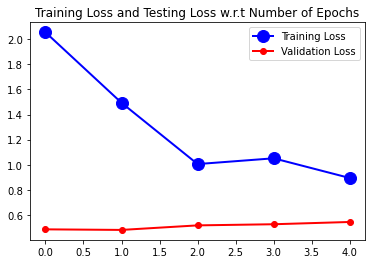

In [12]:
import matplotlib.pyplot as plt

train_acc = eff_history.history['accuracy']
val_acc = eff_history.history['val_accuracy']
train_loss = eff_history.history['loss']
val_loss = eff_history.history['val_loss']
No_Of_Epochs = range(5)

plt.plot(No_Of_Epochs, train_acc, marker = 'o', color = 'blue', markersize = 12, 
                 linewidth = 2, label = 'Training Accuracy')
plt.plot(No_Of_Epochs, val_acc, marker = '.', color = 'red', markersize = 12, 
                 linewidth = 2, label = 'Validation Accuracy')

plt.title('Training Accuracy and Testing Accuracy w.r.t Number of Epochs')

plt.legend()

plt.figure()

plt.plot(No_Of_Epochs, train_loss, marker = 'o', color = 'blue', markersize = 12, 
                 linewidth = 2, label = 'Training Loss')
plt.plot(No_Of_Epochs, val_acc, marker = '.', color = 'red', markersize = 12, 
                 linewidth = 2, label = 'Validation Loss')

plt.title('Training Loss and Testing Loss w.r.t Number of Epochs')

plt.legend()

plt.show()